In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
games = pd.read_csv('./Resources/games.csv')
pff = pd.read_csv('./Resources/pffScoutingData.csv')
players = pd.read_csv('./Resources/players.csv')
plays = pd.read_csv('./Resources/plays.csv')

week1 = pd.read_csv('./Resources/week1.csv')
week2 = pd.read_csv('./Resources/week2.csv')
week3 = pd.read_csv('./Resources/week3.csv')
week4 = pd.read_csv('./Resources/week4.csv')
week5 = pd.read_csv('./Resources/week5.csv')
week6 = pd.read_csv('./Resources/week6.csv')
week7 = pd.read_csv('./Resources/week7.csv')
week8 = pd.read_csv('./Resources/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [3]:
football_tracking = tracking[tracking['nflId'].isna()]

In [4]:
player_tracking = tracking.loc[tracking['team'] != 'football'].copy()
player_tracking = player_tracking.merge(players[['nflId', 'officialPosition']], on='nflId', how='left')

player_tracking = player_tracking.merge(plays[['gameId', 'playId', 'possessionTeam']])
player_tracking['possession'] = player_tracking['team'] == player_tracking['possessionTeam']
player_tracking['possession'] = player_tracking['possession'].apply(lambda x: int(x))

In [5]:
positions = player_tracking[['gameId', 'playId', 'frameId', 'nflId', 'possession', 'o', 'x', 'y']].merge(
    football_tracking[['gameId', 'playId', 'frameId', 'x', 'y']],
    on=['gameId', 'playId', 'frameId'],
    suffixes=('', '_fb')
)

In [6]:
positions['x_rel'] = positions['x_fb'] - positions['x']
positions['y_rel'] = positions['y_fb'] - positions['y']

In [89]:
def show_plot(gameId, playId, frameId):
    
    play_df = positions[
        (positions['gameId'] == gameId) & \
        (positions['playId'] == playId)
    ]
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    
    frame = play_df[play_df['frameId'] == frameId]
    
    for i, r in frame.iterrows():
        plt.scatter(
            r['x_rel'],
            r['y_rel'],
            c='black',
            marker=(2, 2, r['o']),
            linestyle='None',
            s=120
        )
        plt.scatter(
            r['x_rel'],
            r['y_rel'],
            c='black',
            marker=(3, 0, r['o']),
            linestyle='None',
            s=120
        )

    plt.scatter(
        frame['x_rel'].append(pd.Series([0])),
        frame['y_rel'].append(pd.Series([0])),
        c=frame['possession'].append(pd.Series([2]))
    )

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    ax.set_aspect('equal', adjustable='box')

    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks([])
    plt.yticks([])
    
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    
    plt.title(f'gameId: {gameId} | playId: {playId} | frameId: {frameId}')
    
    time.sleep(0.1)
    clear_output(wait=True)
    plt.show()

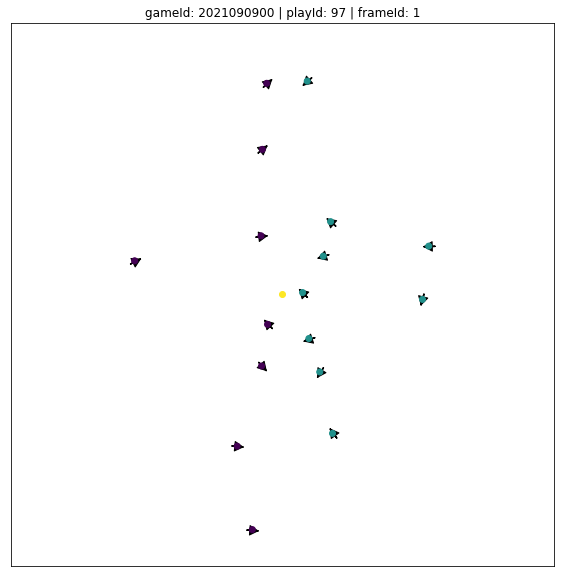

In [92]:
gameId_test = positions['gameId'].loc[0]
playId_test = positions['playId'].loc[0]

for f in range(play_df['frameId'].max()-1):
    show_plot(gameId_test, playId_test, f+1)
show_plot(gameId_test, playId_test, 1)